# DoF Learning

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from dof_learning_test_utils import SwissRoll, run_tsne#, plot_tsne_result
from plot_utils import plot_tsne_result

## Set up some shared parameters

In [4]:
perplexity = 20
random_state = 42
n_jobs = 1
initial_alpha = 1
n_iter = 1000
n_components = 2
dof_lr = 0.5

## Load a SwissRoll with 1000 datapoints

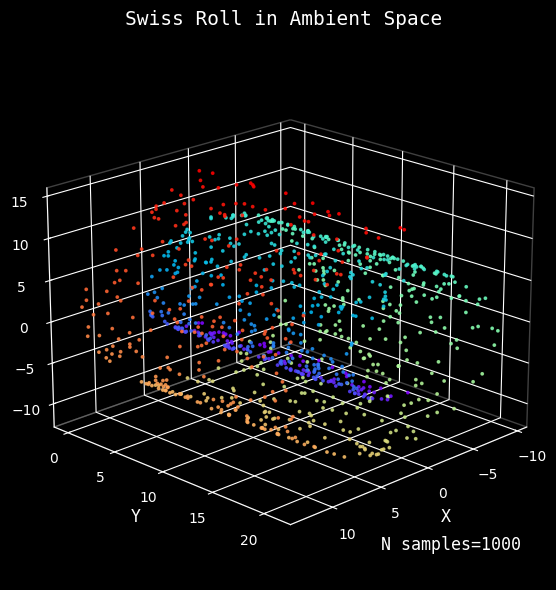

In [5]:
swiss_roll_1k = SwissRoll.generate(n_samples=1000, noise=0.0)
swiss_roll_1k.plot(width=6, height=6)

### Run t-SNE with DoF learning (simple gradient update)

In [5]:
tsne_result = run_tsne(
    swiss_roll_1k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="simple_gradient",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 83.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=83.33 for 250 iterations...
Iteration   50, KL divergence 2.4118, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1201 sec
Iteration  100, KL divergence 2.3404, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0435 sec
Iteration  150, KL divergence 2.3444, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0718 sec
Iteration  200, KL divergence 2.3259, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.2834 sec
Iteration  250, KL divergence 2.3144, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1322 sec
   --> Time elapsed: 5.65 seconds
===> Running optimization with exaggeration=1.00, lr=1000.00 for 1000 iterations...
Iteration   50, KL divergence 0.2420, DoF 3.1159, DoF gradient -0.0152, 50 iterations in 1.9584 sec
Iteration  100, KL divergence 0.2309, DoF 3.5841, DoF gradient -0.0065, 50 iterations in 1.9676

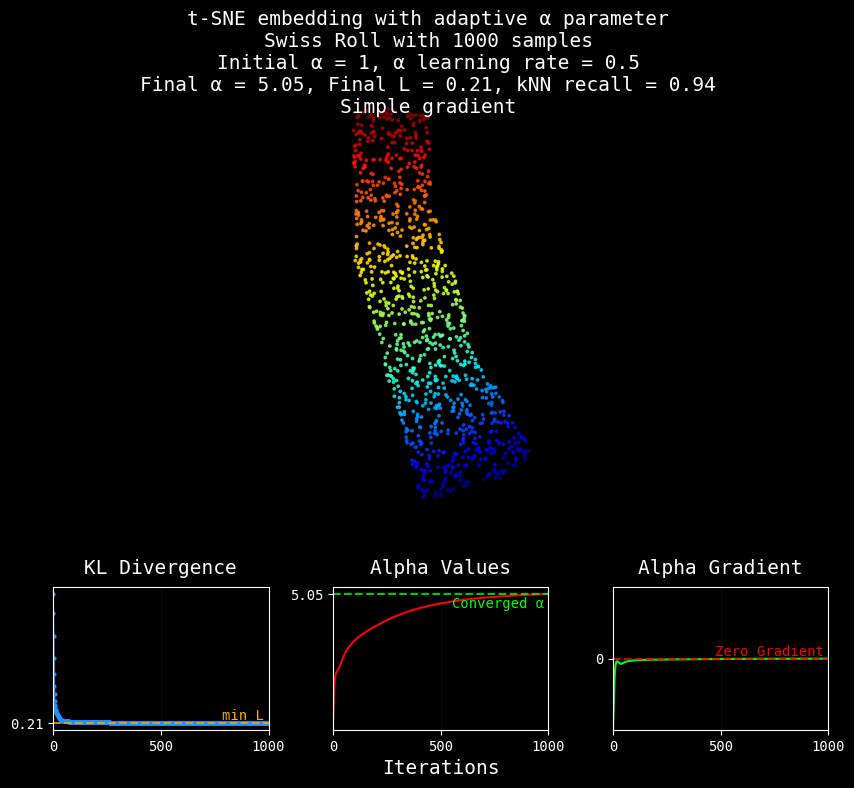

In [6]:
plot_tsne_result(tsne_result, swiss_roll_1k.labels, "Simple gradient", black_template = True)

### Run t-SNE with DoF learning (delta-bar-delta update)

In [7]:
tsne_result = run_tsne(
    swiss_roll_1k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="delta_bar_delta",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 83.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=83.33 for 250 iterations...
Iteration   50, KL divergence 2.4118, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1205 sec
Iteration  100, KL divergence 2.3404, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1805 sec
Iteration  150, KL divergence 2.3444, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0541 sec
Iteration  200, KL divergence 2.3259, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.3450 sec
Iteration  250, KL divergence 2.3144, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.2251 sec
   --> Time elapsed: 5.93 seconds
===> Running optimization with exaggeration=1.00, lr=1000.00 for 1000 iterations...
Iteration   50, KL divergence 0.2314, DoF 7.3709, DoF gradient -0.0615, 50 iterations in 2.0013 sec
Iteration  100, KL divergence 0.2245, DoF 5.7129, DoF gradient -0.0070, 50 iterations in 1.9712

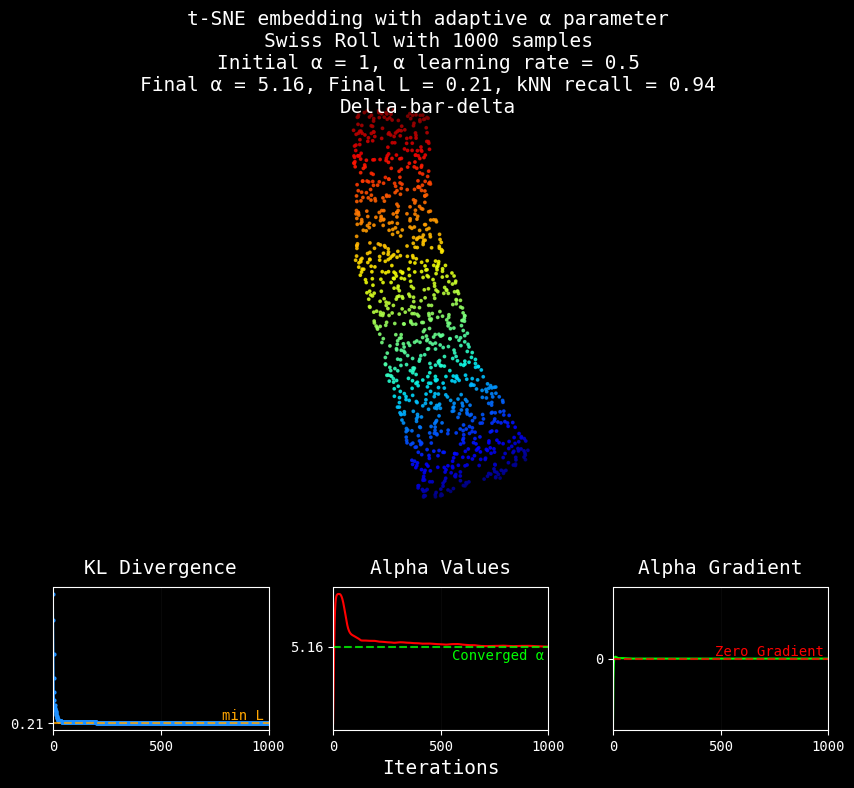

In [8]:
plot_tsne_result(tsne_result, swiss_roll_1k.labels, "Delta-bar-delta", black_template = True)

### Run t-SNE withouy DoF learning (fixed to 1 by default)

In [6]:
tsne_result = run_tsne(
    swiss_roll_1k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof=1,
    negative_gradient_method="bh",
    dataset_name="Swiss Roll",
    )   

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 83.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=83.33 for 250 iterations...
Iteration   50, KL divergence 2.4026, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.2161 sec
Iteration  100, KL divergence 2.4173, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0749 sec
Iteration  150, KL divergence 2.3394, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.0216 sec
Iteration  200, KL divergence 2.3116, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1145 sec
Iteration  250, KL divergence 2.2987, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1340 sec
   --> Time elapsed: 5.56 seconds
===> Running optimization with exaggeration=1.00, lr=1000.00 for 1000 iterations...
Iteration   50, KL divergence 0.6463, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1324 sec
Iteration  100, KL divergence 0.6086, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 1.1090 s

/Users/a1/openTSNE fresh install/openTSNE/examples/plot_utils.py:139: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax_grad.set_ylim(-y_max, y_max)


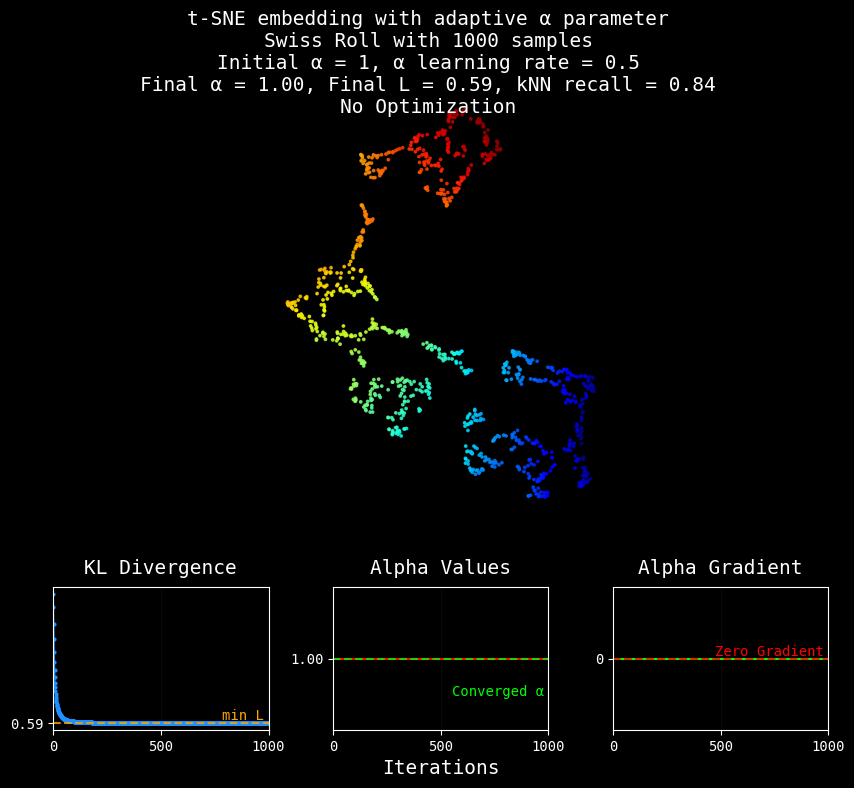

In [7]:
plot_tsne_result(tsne_result, swiss_roll_1k.labels, "No Optimization", black_template = True)

## Load a SwissRoll with 5000 datapoints

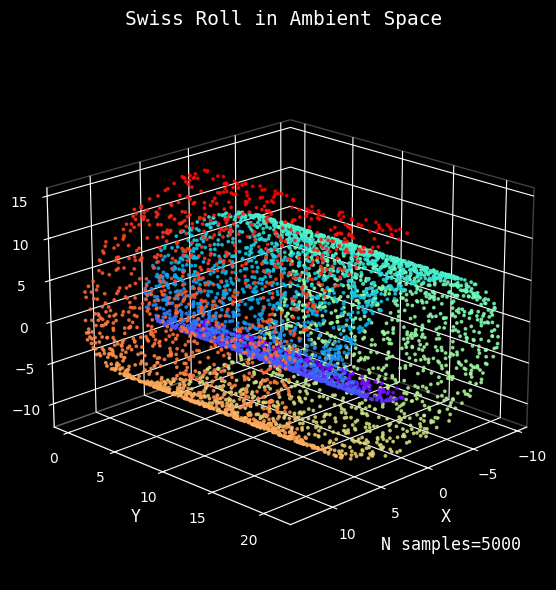

In [11]:
swiss_roll_5k = SwissRoll.generate(n_samples=5000, noise=0.0)
swiss_roll_5k.plot(width=6, height=6)

### Run t-SNE with DoF learning (simple gradient update)

In [12]:
tsne_result = run_tsne(
    swiss_roll_5k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="simple_gradient",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 416.67 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 3.2274, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4926 sec
Iteration  100, KL divergence 3.1241, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.5076 sec
Iteration  150, KL divergence 3.0236, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.7539 sec
Iteration  200, KL divergence 2.9437, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.5710 sec
Iteration  250, KL divergence 2.8947, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.5815 sec
   --> Time elapsed: 37.91 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 for 1000 iterations...
Iteration   50, KL divergence 0.3411, DoF 3.8870, DoF gradient -0.0106, 50 iterations in 11.8465 sec
Iteration  100, KL divergence 0.3204, DoF 4.1880, DoF gradient -0.0035, 50 iterations in 12

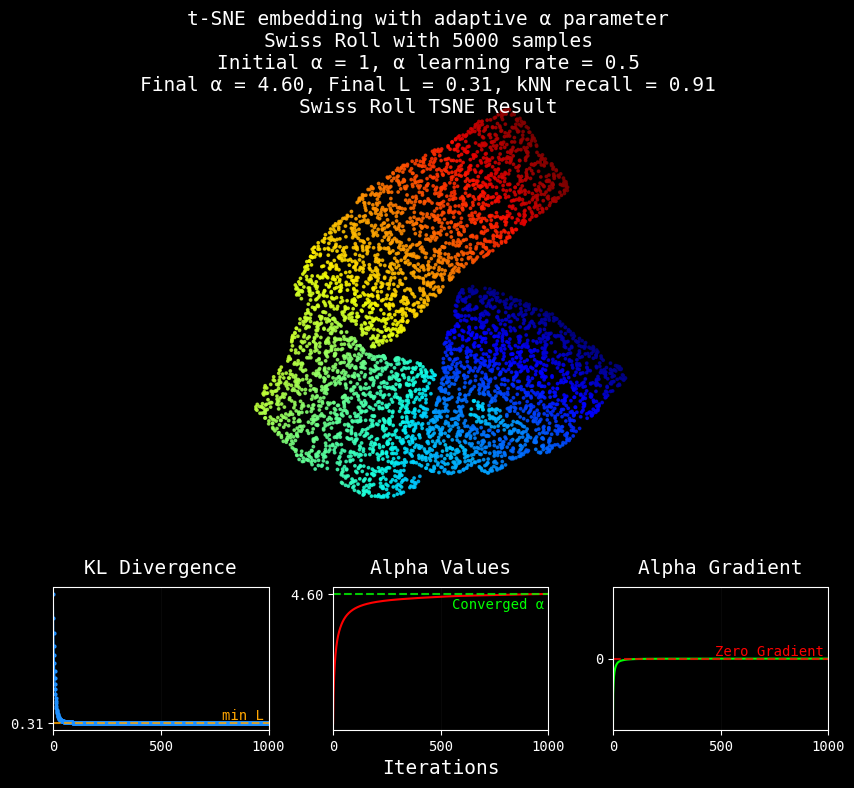

In [13]:
plot_tsne_result(tsne_result, swiss_roll_5k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE with DoF learning (delta-bar-delta update)

In [20]:
tsne_result = run_tsne(
    swiss_roll_5k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="delta_bar_delta",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 416.67 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 3.1998, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4596 sec
Iteration  100, KL divergence 3.1311, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4010 sec
Iteration  150, KL divergence 3.0330, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.5349 sec
Iteration  200, KL divergence 2.9596, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.3081 sec
Iteration  250, KL divergence 2.9175, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.2838 sec
   --> Time elapsed: 36.99 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 for 1000 iterations...
Iteration   50, KL divergence 0.3307, DoF 12.6947, DoF gradient 0.0138, 50 iterations in 11.3937 sec
Iteration  100, KL divergence 0.3201, DoF 12.5292, DoF gradient -0.0160, 50 iterations in 1

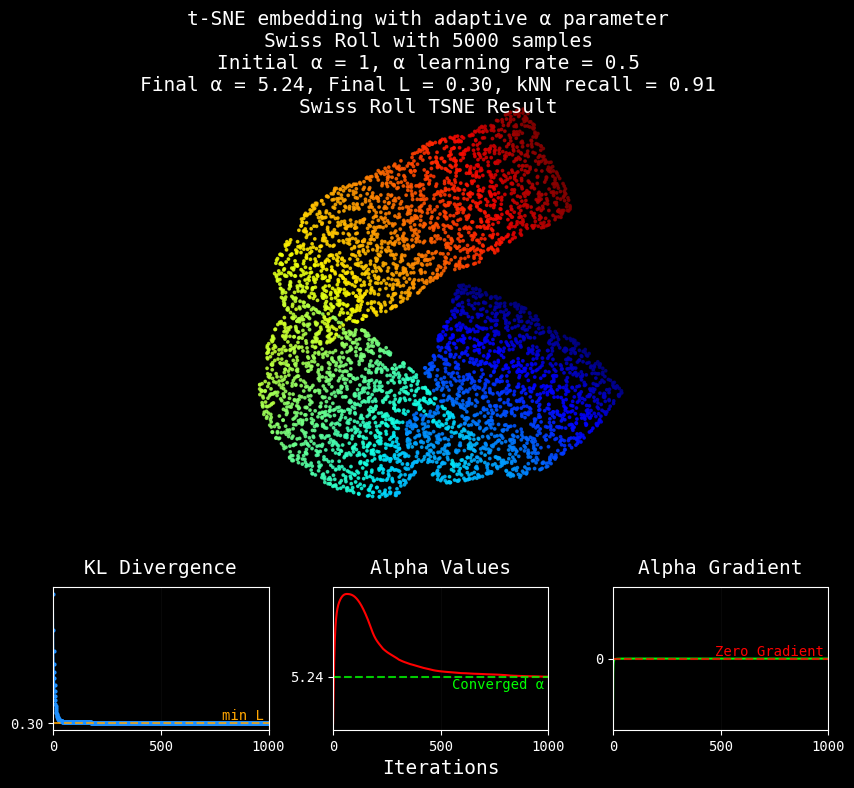

In [21]:
plot_tsne_result(tsne_result, swiss_roll_5k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE without DoF learning (set to 1 by default)

In [22]:
tsne_result = run_tsne(
    swiss_roll_5k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    dof=1,
    negative_gradient_method="bh",
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 416.67 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 3.1998, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.3232 sec
Iteration  100, KL divergence 3.1311, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4424 sec
Iteration  150, KL divergence 3.0330, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.8505 sec
Iteration  200, KL divergence 2.9596, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.0915 sec
Iteration  250, KL divergence 2.9175, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.1275 sec
   --> Time elapsed: 36.84 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 for 1000 iterations...
Iteration   50, KL divergence 1.1278, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.4646 sec
Iteration  100, KL divergence 0.9417, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 7.975

/Users/a1/openTSNE fresh install/openTSNE/examples/plot_utils.py:140: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax_grad.set_ylim(-y_max, y_max)


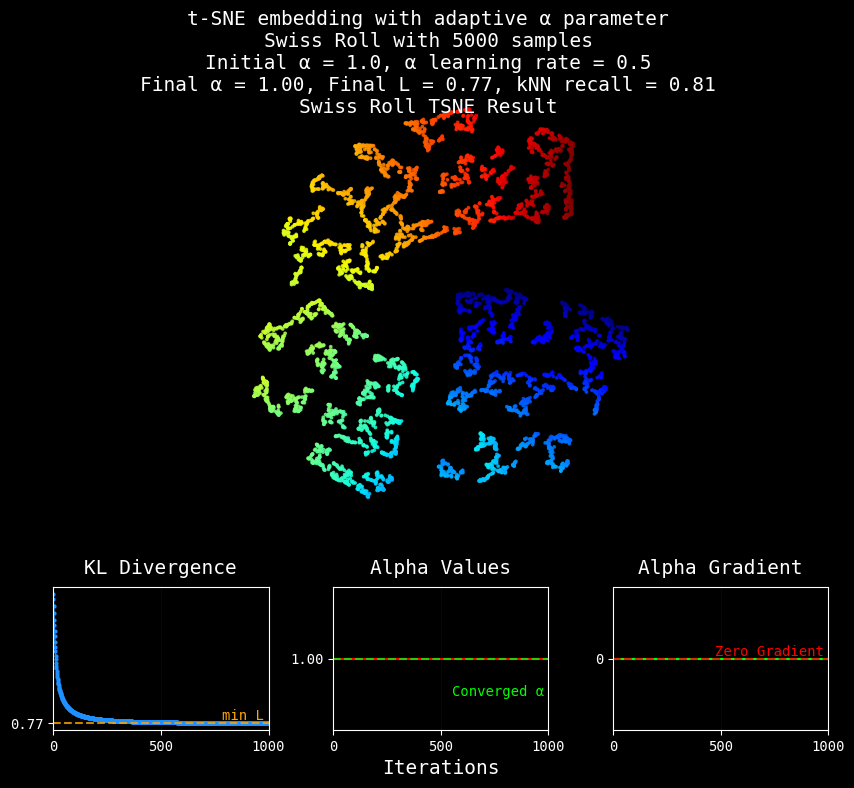

In [23]:
plot_tsne_result(tsne_result, swiss_roll_5k.labels, "Swiss Roll TSNE Result", black_template = True)

## Load a SwissRoll with 10,000 datapoints

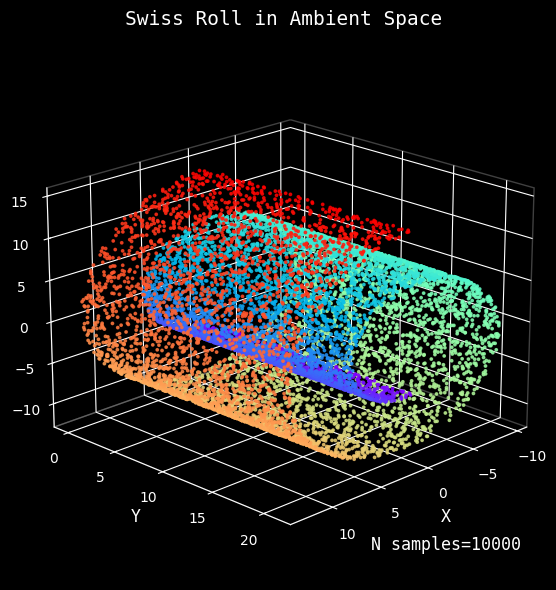

In [24]:
swiss_roll_10k = SwissRoll.generate(n_samples=10000, noise=0.0)
swiss_roll_10k.plot(width=6, height=6)

### Run t-SNE with DoF learning (simple gradient update)

In [26]:
tsne_result = run_tsne(
    swiss_roll_10k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="simple_gradient",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 833.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=833.33 for 250 iterations...
Iteration   50, KL divergence 3.7183, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 20.0665 sec
Iteration  100, KL divergence 3.4973, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 18.7973 sec
Iteration  150, KL divergence 3.3280, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.7324 sec
Iteration  200, KL divergence 3.2412, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.3951 sec
Iteration  250, KL divergence 3.1812, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.1504 sec
   --> Time elapsed: 91.14 seconds
===> Running optimization with exaggeration=1.00, lr=10000.00 for 1000 iterations...
Iteration   50, KL divergence 0.4183, DoF 4.2491, DoF gradient -0.0158, 50 iterations in 29.4798 sec
Iteration  100, KL divergence 0.3334, DoF 4.7053, DoF gradient -0.0053, 50 iterations

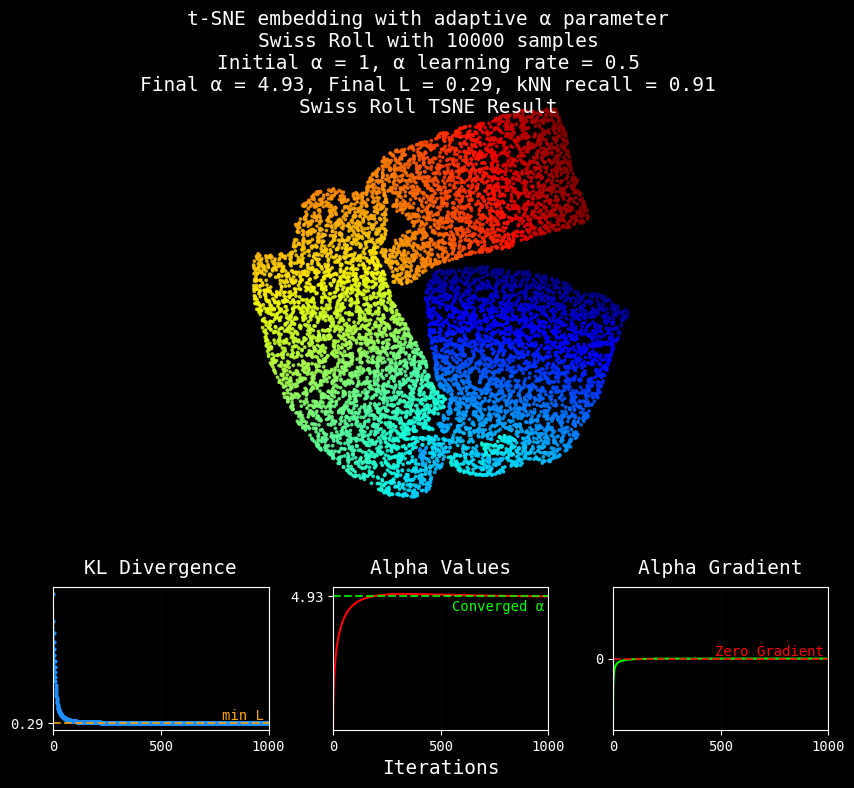

In [27]:
plot_tsne_result(tsne_result, swiss_roll_10k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE with DoF learning (delta-bar-delta update)

In [28]:
tsne_result = run_tsne(
    swiss_roll_10k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof="auto",
    dof_optimizer="delta_bar_delta",
    negative_gradient_method="bh",
    dof_lr=dof_lr,
    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 833.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=833.33 for 250 iterations...
Iteration   50, KL divergence 3.7183, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 16.8767 sec
Iteration  100, KL divergence 3.4973, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 18.6906 sec
Iteration  150, KL divergence 3.3280, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.6261 sec
Iteration  200, KL divergence 3.2412, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.5085 sec
Iteration  250, KL divergence 3.1812, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 16.5819 sec
   --> Time elapsed: 87.28 seconds
===> Running optimization with exaggeration=1.00, lr=10000.00 for 1000 iterations...
Iteration   50, KL divergence 0.4057, DoF 15.2346, DoF gradient 0.0662, 50 iterations in 26.3439 sec
Iteration  100, KL divergence 0.3470, DoF 16.8309, DoF gradient 0.0024, 50 iterations

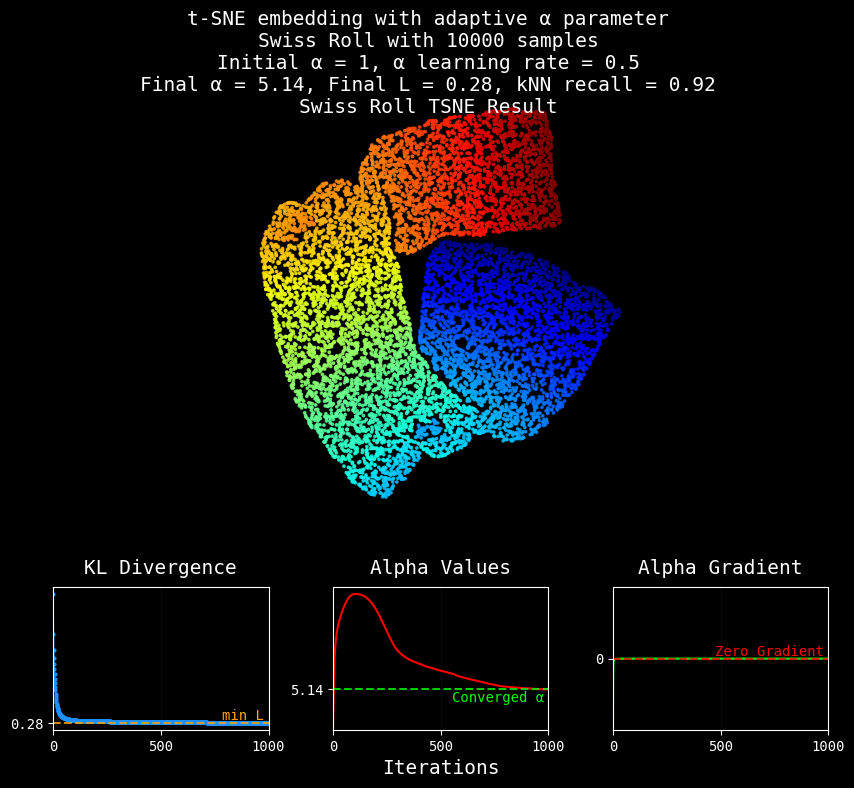

In [29]:
plot_tsne_result(tsne_result, swiss_roll_10k.labels, "Swiss Roll TSNE Result", black_template = True)

### Run t-SNE without DoF learning (set to 1 by default)

In [30]:
tsne_result = run_tsne(
    swiss_roll_10k.datapoints,
    perplexity=perplexity,
    random_state=random_state,
    n_components=n_components,
    n_iter=1000,
    initial_dof=initial_alpha,
    dof=1,
    negative_gradient_method="bh",

    dataset_name="Swiss Roll",
    
)

Performing the early exaggeration fase with exaggeration = 12 and learning rate = 833.33 for 250 iterations...
===> Running optimization with exaggeration=12.00, lr=833.33 for 250 iterations...
Iteration   50, KL divergence 3.7183, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 16.8920 sec
Iteration  100, KL divergence 3.4973, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.3787 sec
Iteration  150, KL divergence 3.3280, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.7028 sec
Iteration  200, KL divergence 3.2412, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.4675 sec
Iteration  250, KL divergence 3.1812, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.2922 sec
   --> Time elapsed: 86.73 seconds
===> Running optimization with exaggeration=1.00, lr=10000.00 for 1000 iterations...
Iteration   50, KL divergence 1.4940, DoF 1.0000, DoF gradient 0.0000, 50 iterations in 17.7309 sec
Iteration  100, KL divergence 1.2077, DoF 1.0000, DoF gradient 0.0000, 50 iterations i

/Users/a1/openTSNE fresh install/openTSNE/examples/plot_utils.py:140: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax_grad.set_ylim(-y_max, y_max)


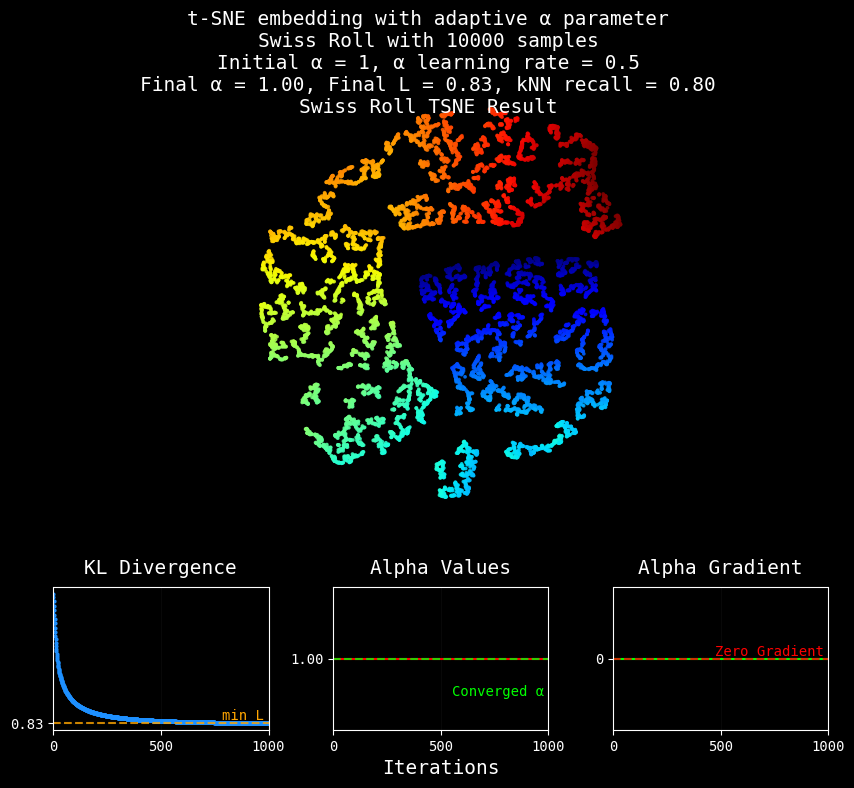

In [31]:
plot_tsne_result(tsne_result, swiss_roll_10k.labels, "Swiss Roll TSNE Result", black_template=True)